In [16]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import pandas as pd
import colorsys
import json
import ast

# Preprocess data 



### 405:
regex : ([a-zA-Z0-9]*): to replace with : "$1":

regex : (\([0-9]*,[0-9]*\)) to replace with "$1"

regex : (True|False) to replace with "$1"

regex : " " to replace with ""

### TIL:
regex : ([a-zA-Z]+[0-9]{0,1}): to replace with : "$1":

regex : (True|False) to replace with "$1"

([0-9]{4}-[0-9]{2}-[0-9]{2} [0-9]{2}:[0-9]{2}:[0-9]{2}\.[0-9]*) to replace with "$1"

regex : (\([0-9]*,[0-9]*\)) to replace with "$1"

In [33]:
file = open('LpsData_STS405b.txt', 'r')

df_405 = pd.DataFrame(columns=["MarkersValid", "TrolleyPos", "Hoistpos", "NoOfMarkers", "m1", "m2", "m3", "m4", "m5", "m6"])
tab = []
while True:
    line = file.readline()
    if not line:
        break
    res = json.loads("{"+line+"}")
    df_405.loc[len(df_405)] = res

df_405.to_csv("sts405.csv", index=False)

In [34]:
file = open('LpsData_TILsts.txt', 'r')

df_TIL = pd.DataFrame(columns=["Time", "MarkersValid", "TrolleyPos", "Hoistpos", "NoOfMarkers", "m1", "m2", "m3", "m4", "m5", "m6"])
tab = []
while True:
    line = file.readline()
    if not line:
        break
    res = json.loads("{"+line+"}")
    df_TIL.loc[len(df_TIL)] = res

df_TIL.to_csv("TILsts.csv", index=False)

# 1 - Exploration des données / Plots

In [35]:
df_405.head()

,MarkersValid,TrolleyPos,Hoistpos,NoOfMarkers,m1,m2,m3,m4,m5,m6
0,True,-10.938,5.290,3,"(65122,62961)","(65383,65641)","(64929,68233)","(53988,70329)","(69367,70476)","(128541,76826)"
1,True,-10.938,5.290,3,"(65122,62961)","(65383,65641)","(64929,68233)","(53988,70329)","(69367,70476)","(128541,76826)"
2,True,-10.940,6.401,3,"(65193,62799)","(65484,65535)","(65016,68183)","(53988,70329)","(69367,70476)","(128541,76826)"
3,True,-10.939,7.130,3,"(65137,62737)","(65421,65513)","(64964,68196)","(53988,70329)","(69367,70476)","(128541,76826)"
4,True,-10.939,7.130,3,"(65137,62737)","(65421,65513)","(64964,68196)","(53988,70329)","(69367,70476)","(128541,76826)"


In [19]:
df_TIL.head()

,Time,MarkersValid,TrolleyPos,Hoistpos,NoOfMarkers,m1,m2,m3,m4,m5,m6
0,NaN,True,28.285,4.947,6,"(63382,63453)","(68948,63504)","(66250,63637)","(46590,100851)","(80082,111422)","(91254,120923)"
1,NaN,True,28.285,4.947,5,"(63381,63453)","(68946,63504)","(66250,63636)","(88349,103933)","(111103,109365)","(38222,109347)"
2,NaN,True,28.285,4.947,6,"(63386,63452)","(68951,63503)","(66255,63633)","(111109,113055)","(129417,119518)","(127152,123718)"
3,NaN,True,28.285,4.947,6,"(63384,63457)","(68950,63508)","(66256,63644)","(115677,108628)","(105525,110415)","(94293,121239)"
4,NaN,True,28.285,4.947,7,"(63376,63459)","(68942,63511)","(66248,63649)","(98350,95010)","(64812,101301)","(122626,112416)"


<Axes: >

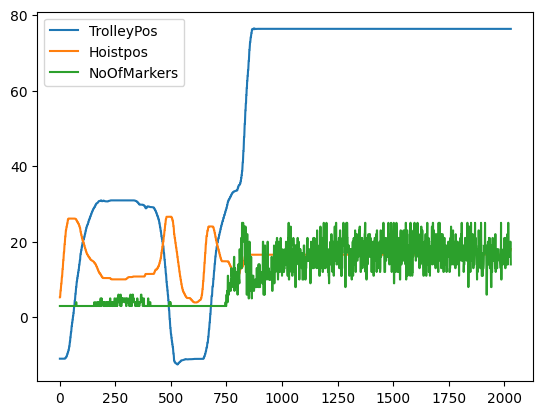

In [36]:
df_405.plot()

<Axes: >

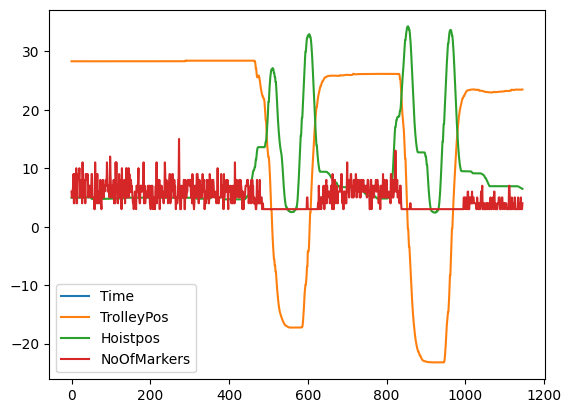

In [20]:
df_TIL.plot()

In [37]:
# Sélection des colonnes contenant les coordonnées des marqueurs
def get_res_data(df):
    marker_columns = [col for col in df.columns if col.startswith('m') and not col.endswith('x') and not col.endswith('y')]
    res = {marker_column: [] for marker_column in marker_columns}
    for marker_column in marker_columns:
        arr = df[marker_column].values
        tab = []
        for val in arr:
            tab.append(ast.literal_eval(val))
        res[marker_column] = tab
    return res


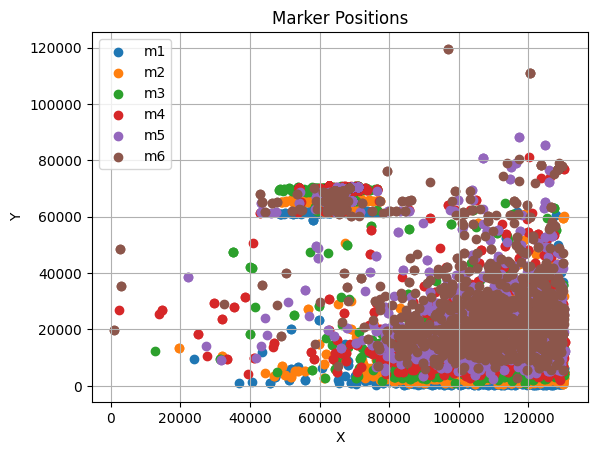

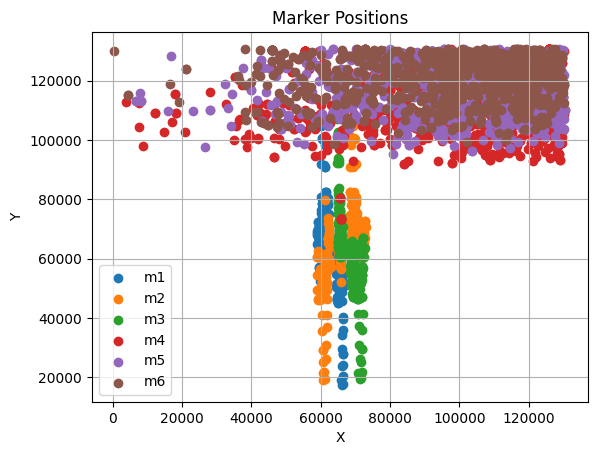

In [40]:
def plot_res(res):
    for marker, coordinates in res.items():
        x_values, y_values = zip(*coordinates)
        plt.scatter(x_values, y_values, label=marker)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Marker Positions')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_res(get_res_data(df_405))
plot_res(get_res_data(df_TIL))

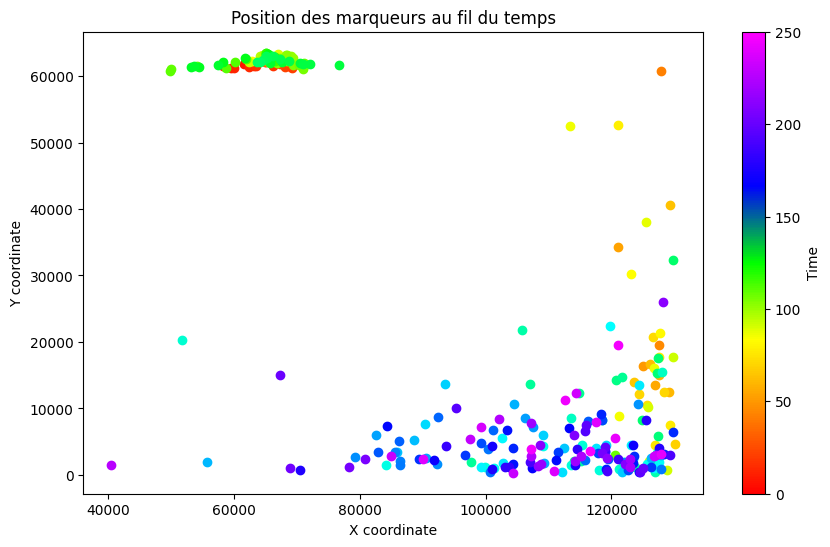

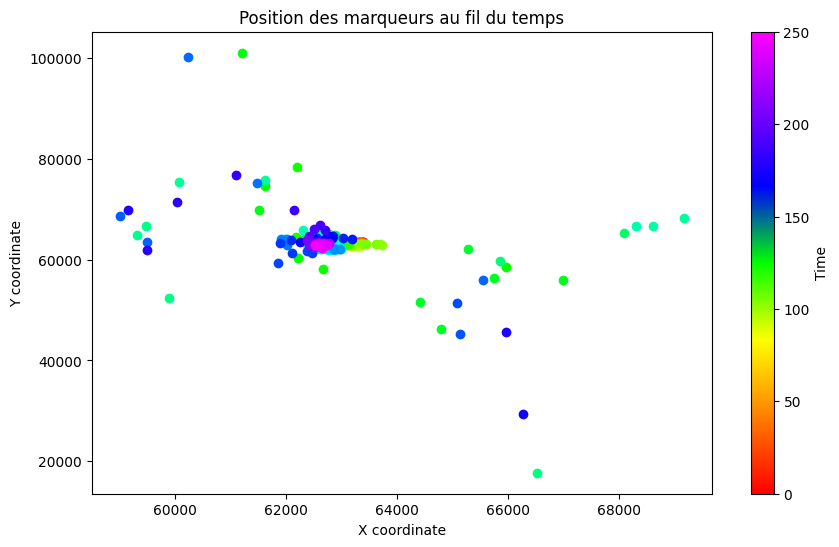

In [53]:
dfs = [pd.read_csv("sts405.csv"), pd.read_csv("TILsts.csv")]

for df in dfs:
    data = df[df["MarkersValid"]==True]

    markers_data = data.filter(like='m', axis=1)
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a subplot

    colors = []
    l_x = []
    l_y = []

    for i in range(250):
        rgb = colorsys.hsv_to_rgb(i / 300., 1.0, 1.0)
        colors.append(rgb)

    for j in range(0, len(markers_data["m1"]), 5):
        x = ast.literal_eval(markers_data.iloc[j]["m1"])[0]
        y = ast.literal_eval(markers_data.iloc[j]["m1"])[1]
        l_x.append(x)
        l_y.append(y)
        id_color = int(j/len(markers_data["m1"])*len(colors))
        ax.scatter(x, y, color=colors[id_color])  # Use the subplot's scatter function

    ax.set_xlabel("X coordinate")
    ax.set_ylabel("Y coordinate")
    ax.set_title("Position des marqueurs au fil du temps")

    norm = Normalize(vmin=0, vmax=len(colors))
    colors = [(1, 0, 0), (1, 0.5, 0), (1, 1, 0), (0, 1, 0), (0, 0, 1), (0.5, 0, 1), (1, 0, 1)]
    cmap = LinearSegmentedColormap.from_list("RedToPink", colors)
    sm = ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Time')
    plt.show()


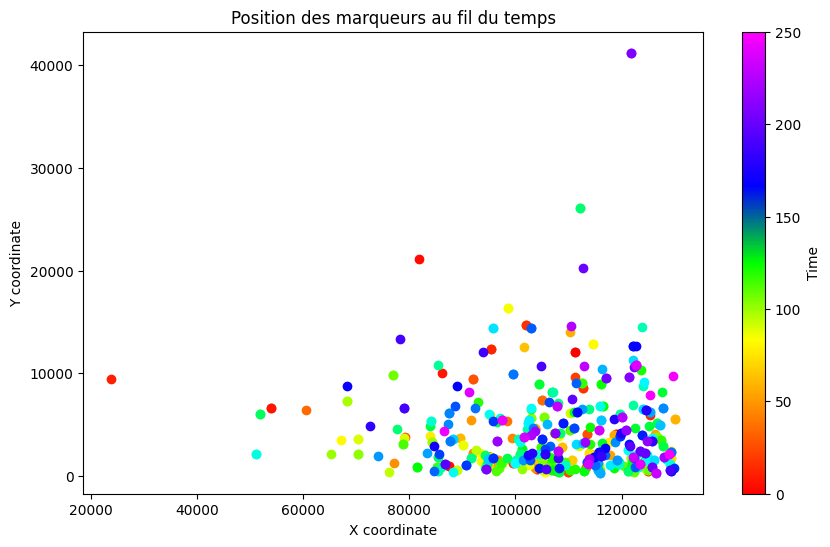

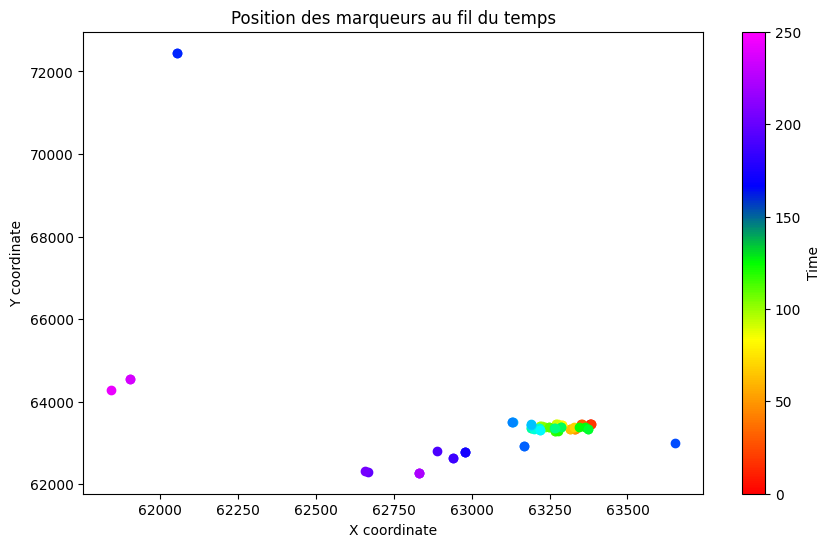

In [52]:
dfs = [pd.read_csv("sts405.csv"), pd.read_csv("TILsts.csv")]

for df in dfs:
    data = df
    data = data[data["MarkersValid"]==False]

    markers_data = data.filter(like='m', axis=1)
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a subplot

    colors = []
    l_x = []
    l_y = []

    for i in range(250):
        rgb = colorsys.hsv_to_rgb(i / 300., 1.0, 1.0)
        colors.append(rgb)

    for j in range(0, len(markers_data["m1"]), 1):
        x = ast.literal_eval(markers_data.iloc[j]["m1"])[0]
        y = ast.literal_eval(markers_data.iloc[j]["m1"])[1]
        l_x.append(x)
        l_y.append(y)
        id_color = int(j/len(markers_data["m1"])*len(colors))
        ax.scatter(x, y, color=colors[id_color])  # Use the subplot's scatter function

    ax.set_xlabel("X coordinate")
    ax.set_ylabel("Y coordinate")
    ax.set_title("Position des marqueurs au fil du temps")

    norm = Normalize(vmin=0, vmax=len(colors))
    colors = [(1, 0, 0), (1, 0.5, 0), (1, 1, 0), (0, 1, 0), (0, 0, 1), (0.5, 0, 1), (1, 0, 1)]
    cmap = LinearSegmentedColormap.from_list("RedToPink", colors)
    sm = ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Time')
    plt.show()


# 2 - Vitesse des marqueurs

Je n'ai pas compris qu'elles étaient les 3 marqueurs.

Comment savoir lequel des 26 marqueurs est dans les 6 marqueurs de chaque ligne ?

# 3 - ML to predict 

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [26]:
df1 = pd.read_csv("sts405.csv")
df2 = pd.read_csv("TILsts.csv").drop(columns=["Time"]) # Un seul des fichiers a le temps en colonne
df = pd.concat([df1, df2])
columns = [col for col in df.columns if "m" in col]
print(columns)

for col in columns:
    df[col+"_x"] = df1[col].apply(lambda x: np.array(ast.literal_eval(x))[0])
    df[col+"_y"] = df1[col].apply(lambda x: np.array(ast.literal_eval(x))[1])

df = df.drop(columns=columns)

df.head()

['m1', 'm2', 'm3', 'm4', 'm5', 'm6']


,MarkersValid,TrolleyPos,Hoistpos,NoOfMarkers,m1_x,m1_y,m2_x,m2_y,m3_x,m3_y,m4_x,m4_y,m5_x,m5_y,m6_x,m6_y
0,True,-10.938,5.290,3,65122,62961,65383,65641,64929,68233,53988,70329,69367,70476,128541,76826
1,True,-10.938,5.290,3,65122,62961,65383,65641,64929,68233,53988,70329,69367,70476,128541,76826
2,True,-10.940,6.401,3,65193,62799,65484,65535,65016,68183,53988,70329,69367,70476,128541,76826
3,True,-10.939,7.130,3,65137,62737,65421,65513,64964,68196,53988,70329,69367,70476,128541,76826
4,True,-10.939,7.130,3,65137,62737,65421,65513,64964,68196,53988,70329,69367,70476,128541,76826


Accuracy: 0.9166666666666666
Confusion matrix:


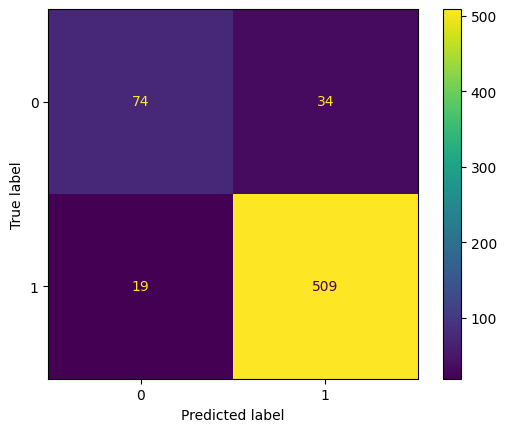

In [27]:
X = df.drop("MarkersValid", axis=1)
y = df["MarkersValid"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
disp = ConfusionMatrixDisplay(confusion)
disp.plot()
plt.show()

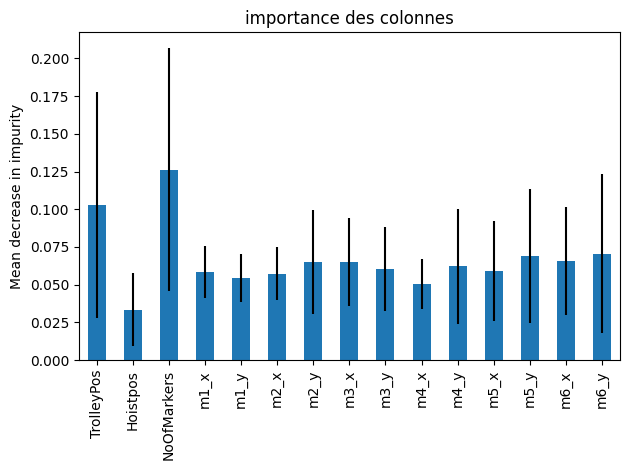

In [28]:
feature_names = list(X.columns)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("importance des colonnes")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()
